### SOM PROJEKAT - Breast Cancer Wisconsin
Petar Kovačević 2020/0428, Strahinja Nikolić 2020/0069

Link do baze: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
Baza se sastoji od atributa izvučenih iz slika jezgra ćelija kancera.

1. [4] Izvršiti analizu skupa podataka. Ako ima nedostajućih/neadekvatnih vrednosti zameniti ih
očekivanim vrednostima u okviru date klase ili ih ukloniti uz odgovarajuće obrazloženje. Ukoliko postoje
nominalni/kategorički atributi izvršiti adekvatno kodovanje i prevođenje u numeričke atribute uz
odgovarajuće obrazloženje. Za klase koje imaju ispod 3-5% (odabrati granicu) ukupne populacije
smatrati da su male i formirati klasu „Ostalo“ u okviru koje će se nalaziti sve klase brojnosti ispod 3-5%.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

data = pd.read_csv('05_breast_cancer_2_dataset.csv')

In [153]:
# data['dignosis'].replace({'M': 1, 'B': 0})
data['diagnosis'].replace('M', 1, inplace=True)
data['diagnosis'].replace('B', 0, inplace=True)
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [154]:
#  nema NAN vrednosti u datasetu
data.replace('NAN', np.nan, inplace=True)
data.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

Postoji 30 atributa u bazi podataka, i jedna kolona koja predstavlja target, to je diagnosis, koja sadrži dve klase. Osim diagnosis kolone, sve ostale su numeričke kontinualne vrednosti.

In [155]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [156]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


2. [6] Ispitati korelaciju između obeležja, obrazložiti koja metoda je korišćena. Prikazati raspodelu
koeficijenta korelacije izabrane baze podataka. Odrediti IG parametar, pa komentarisati rezultate. U cilju
preglednosti, za ovu tačku, nakon proučavanja baze podataka izabrati 10 obeležja, tj. atributa (ukoliko
baza ima manje obeležja, izabrati sva).

In [157]:
from sklearn import feature_selection

ig = feature_selection.mutual_info_classif(X, y)
ig_idx = ig.argsort()[::-1][0:10]
max_ig = X.columns[ig.argsort()[::-1]]
print("Prvih 10 atributa sa najvećim IG: ")
for i in ig_idx:
    print(max_ig[i], ig[i])


Prvih 10 atributa sa najvećim IG: 
compactness_se 0.4766203422090438
fractal_dimension_worst 0.4644855865332578
symmetry_worst 0.4565115202730794
area_mean 0.4419600496287601
symmetry_se 0.436886881694879
radius_worst 0.40261937779819945
concavity_mean 0.37274580533627555
concave points_mean 0.36240398887745706
perimeter_worst 0.3617406648778212
compactness_worst 0.3409139744165093


Vrednosti IG parametara > 0.3 se generalno mogu smatrati za visoke, tako da je dobar znak to što imamo preko 10 atributa sa ovim vrednostima IG parametra.

Izabrano 10 obelezja po najvecem IG

In [158]:
X_10 = X[X.columns[ig_idx]]

<Axes: >

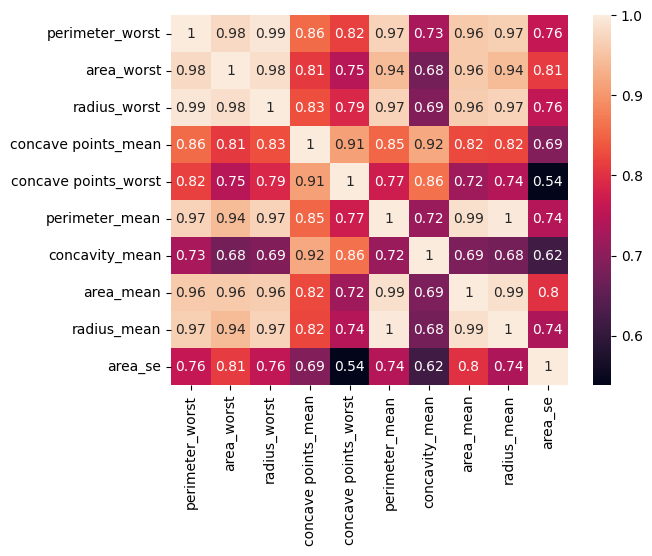

In [159]:
corr_mat = X_10.corr()
sns.heatmap(corr_mat, annot=True)

Matrica korelacije nam pokazuje da postoji velika korelacija između parova atributa, što je i bilo za očekivati, s obzirom da atributi kao što su prečnik, obim i površina matematički imaju povezanosti.

3. [6] Primenom LDA metode za redukciju dimenzija nad celim skupom obeležja, ispitati smislenost
(mogućnost) redukcije na dve i tri dimenzije. Komentarisati rezultate. Ukoliko je skup podataka podeljen
na dve klase proveriti da li bolje rezultate daje redukcija dimenzija PCA metodom na dve dimenzije ili
LDA metoda na jednu dimenziju. Prikazati grafik raspodele odbiraka po klasama nakon redukcije
dimenzija.

Kako naša baza podataka ima dve klase, radimo LDA redukciju na jednu dimenziju.

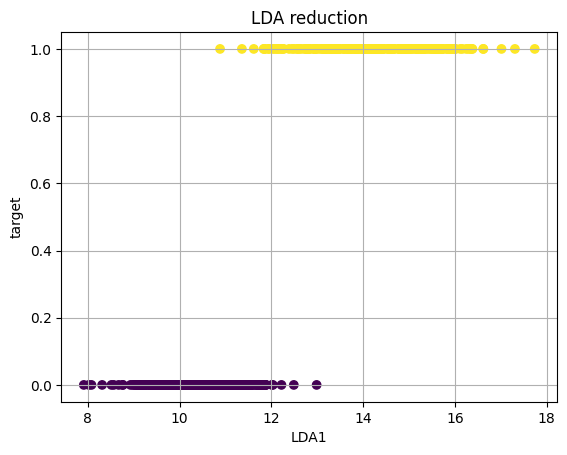

In [160]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

num_dims = 1

lda = LDA(solver='eigen', n_components=num_dims)
ldaComponents = lda.fit_transform(X, y)

plt.figure()
plt.scatter(ldaComponents, y, c=y)
plt.title('LDA reduction')
plt.xlabel('LDA1')
plt.ylabel('target')
plt.grid()

Text(0.5, 1.0, 'PCA all')

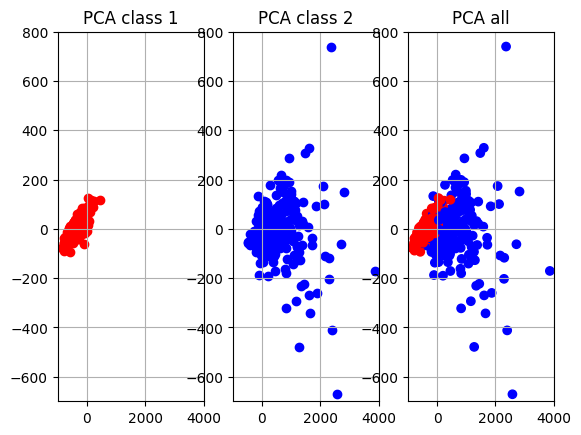

In [161]:
from sklearn.decomposition import PCA

no_comp = 2
pca = PCA(n_components=no_comp)
pcaComponents = pca.fit_transform(X, y)

pca_class_1 = pcaComponents[y==0]
pca_class_2 = pcaComponents[y==1]
c = []
for p in pcaComponents:
    if p in pca_class_1:
        c.append('r')
    else:
        c.append('b')

fix, axes = plt.subplots(1, 3)
axes[0].scatter(pca_class_1[:, 0], pca_class_1[:, 1], c='r')
axes[1].scatter(pca_class_2[:, 0], pca_class_2[:, 1], c='b')
axes[2].scatter(pcaComponents[:,0], pcaComponents[:,1], c=c)
axes[0].set_xlim([-1000, 4000])
axes[1].set_xlim([-1000, 4000])
axes[2].set_xlim([-1000, 4000])
axes[0].set_ylim([-700, 800])
axes[1].set_ylim([-700, 800])
axes[2].set_ylim([-700, 800])
axes[0].grid()
axes[1].grid()
axes[2].grid()
axes[0].set_title('PCA class 1')
axes[1].set_title('PCA class 2')
axes[2].set_title('PCA all')

Kvalitativno, deluje da LDA redukcija na jednu dimenziju daje bolje raslojavanje podataka. 

4. [8] Na podacima iz tačke 6 (izabrati dimenziju uz obrazloženje) primeniti:
- u slučaju dve klase: parametarski klasifikator po izboru u skladu sa separabilnošću podataka;
- u slučaju više klasa: test više hipoteza.
Ukoliko LDA redukcija dimenzija iz tačke 6 ne daje zadovoljavajuću separabilnost klasa, razmotriti
mogućnost smanjenja broja obeležja na osnovu njihove informativnosti, pa projektovati adekvatan
klasifikator na bazi testiranja hipoteza nad takvim višedimenzionim podacima.


Voditi računa o podeli na obučavajući i testirajući skup. Rezultate prikazati u vidu konfuzione matrice, a
tamo gde je to moguće dati i grafički prikaz rezultata na podacima redukovane dimenzije.

Koristićemo linearni klasifikator na bazi željenog izlaza.

In [162]:
# 80/20 train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=int(len(X)*0.8), stratify=y)

In [163]:
lda_X_train, lda_X_test, lda_y_train, lda_y_test = train_test_split(ldaComponents, y.values, train_size=int(len(X)*0.8), stratify=y)

Parametri linearnog klasifikatora su [0.40515284] i [-5.0615721]


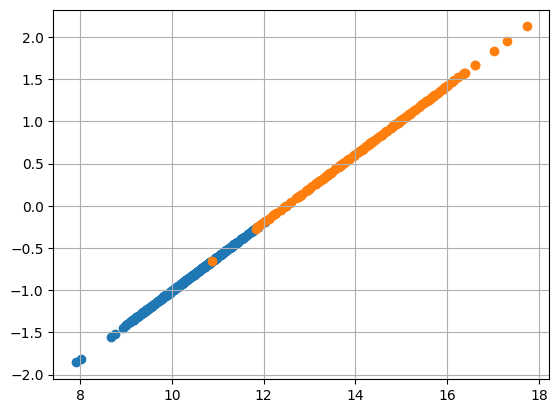

In [164]:
N = len(lda_X_train)

K1 = lda_X_train[lda_y_train==0]
K2 = lda_X_train[lda_y_train==1]

Z1 = np.append(-K1, -np.ones((len(K1), 1)), axis=1).T
Z2 = np.append(K2, np.ones((len(K2), 1)), axis=1).T
U = np.append(Z1, Z2, axis=1)

Gama = np.ones((N, 1))

W = np.linalg.inv(U @ U.T) @ U @ Gama

V = W[:-1]
V0 = W[-1]
print("Parametri linearnog klasifikatora su {} i {}".format(V.flatten(), V0))

plt.figure()
plt.scatter(K1, V*K1+V0)
plt.scatter(K2, V*K2+V0)
plt.grid()


Tačnost: 0.96
Preciznost: 1.0
F1: 0.94


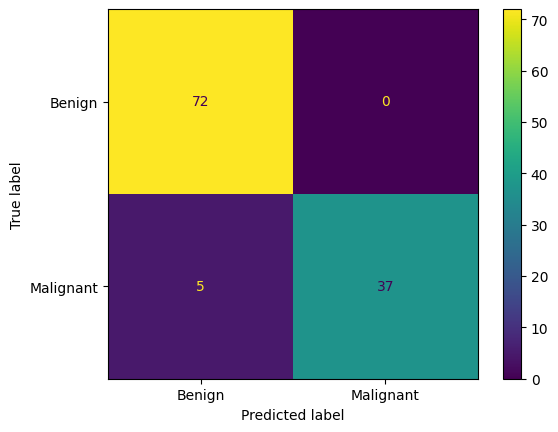

In [165]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

y_pred = np.sign(lda_X_test * V + V0)
y_pred[y_pred==-1] = 0

print("Tačnost: {:.2f}".format(accuracy_score(lda_y_test, y_pred)))
print("Preciznost: {}".format(precision_score(lda_y_test, y_pred)))
print("F1: {:.2f}".format(f1_score(lda_y_test, y_pred)))

#plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(lda_y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot()

Vidimo da linearni klasifikator daje odlične rezultate na test skupu, svi slučajevi iz benigne klase su tačno klasifikovani, dok je samo 4 slučaja iz maligne loše klasifikovano.

5. [8] U skladu sa separabilnošću klasa zabrati jednu od metoda neparametarske klasifikacije i nad celim
skupom podataka istrenirati izabrani klasifikator. Metodom krosvalidacije pronaći optimalne vrednosti
parametara za svaki od klasifikatora, i to:
- u slučaju KNN klasifikatora optimalan broj suseda
- u slučaju stabla odlučivanja maksimalnu dubinu stabla

Priložiti grafik zavisnosti tačnosti klasifikacije od vrednosti parametara koji se optimizuje, a zatim
prikazati konfuzionu matricu kao rezultat testiranja optimalnog klasifikatora.

Odlučili smo se za KNN klasifikator, s obzirom na numeričku prirodu atributa u bazi podataka.

In [166]:
import warnings
warnings.filterwarnings('ignore')

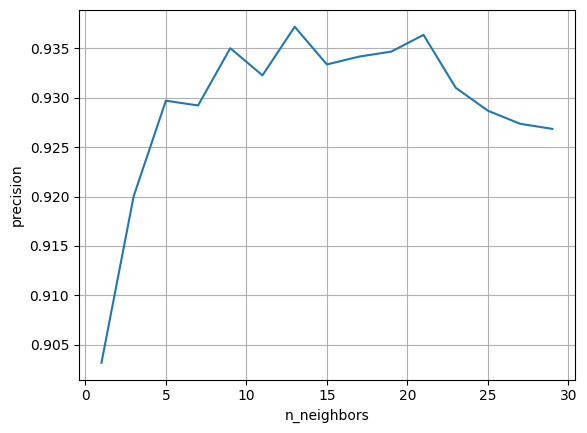

In [167]:
# knn
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

scoring = ['precision_macro']
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
precision = []
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_validate(knn, X, y, scoring=scoring)
    precision.append(scores['test_precision_macro'].mean())

plt.figure()
plt.plot(n_neighbors, precision)
plt.xlabel('n_neighbors')
plt.ylabel('precision')
plt.grid()



In [168]:
print("Najbolja preciznost je za {} suseda i iznosi {:.2f}".format(n_neighbors[np.argmax(precision)], np.max(precision)))

Najbolja preciznost je za 13 suseda i iznosi 0.94


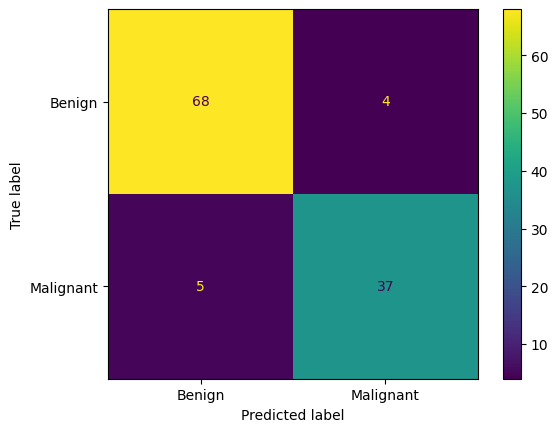

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=int(len(X)*0.8), stratify=y)

knn = KNeighborsClassifier(n_neighbors=n_neighbors[np.argmax(precision)])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot()


Vidimo da je KNN klasifikator nešto lošiji od prethodnog pristupa (LDA + linearni klasifikator). Postoje načini da se ovo popravi, recimo mogla bi prvo da se primeni PCA redukcija na manje dimenzija pa da se potom radi KNN. U tom slučaju bi očekivali bolju separabilnost klasa, pa samim tim i veću preciznost i f1.

6. [8] Nad celim skupom podataka izvršiti obučavanje i testiranje različitih struktura neuralne mreže i to:
- sa jednim i više skrivenih slojeva, kao i sa različitim brojem neurona u slojevima. Ilustrovati
primer dobrog izbora broja neurona, premalog i prevelikog (Pravilan izbor vrednosti u tačkama a. i b. će
se bodovati);
- Pokazati mogućnosti zaštite od preobučavanja: a) ranim zaustavljanjem, b) regularizacijom.
Za svako obučavanje mreže priložiti grafik performanse, a zatim prikazati konfuzionu matricu kao
rezultat testiranja.

In [170]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader, random_split, TensorDataset

In [171]:
# data preparation
data = pd.read_csv('05_breast_cancer_2_dataset.csv')
data['diagnosis'].replace('M', 1, inplace=True)
data['diagnosis'].replace('B', 0, inplace=True)

# shuffling
np.random.shuffle(data.values)

split_idx = int(0.8 * data.shape[0])
train_set = data[:split_idx]
test_set = data[split_idx:]

train_X = torch.tensor(train_set.drop(['diagnosis'], axis = 1).values, dtype=torch.float) 
train_y = F.one_hot(torch.tensor(train_set['diagnosis'].values), 2)
test_X = torch.tensor(test_set.drop(['diagnosis'], axis = 1).values, dtype=torch.float)
test_y = F.one_hot(torch.tensor(test_set['diagnosis'].values), 2)

# BATCH SIZE
batch_size = 8

train_dataloader = DataLoader(TensorDataset(train_X, train_y), batch_size=batch_size, shuffle=True, drop_last=True)
test_dataloader = DataLoader(TensorDataset(test_X, test_y), batch_size=batch_size, shuffle=True, drop_last=True)

In [172]:

# train and test loops
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    train_loss = []

    for batch, (X, y) in enumerate(dataloader):
        
        # Compute prediction and loss
        pred = model(X)
        y = y.type(torch.float)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss, current = loss.item(), (batch + 1) * len(X)
        if (batch % 5 == 0):
            train_loss.append(loss)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return train_loss



def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0 
    # test_losses = []
    model.eval()

    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            pred = model(X)
            y = y.view([batch_size, 2])
            y = y.type(torch.float)
            loss = loss_fn(pred, y).item()
            test_loss += loss
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()
            # if (batch % 5 == 0):
                # test_losses.append(loss)

    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')
    return correct

In [175]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_dataloader):
        y_pred = []
        y_true = []

        with torch.no_grad():
                # iterate over test data
                for inputs, labels in test_dataloader:
                        output = model(inputs) # Feed Network
                        y_pred.extend(torch.max(output, 1).indices.numpy()) # Save Prediction
                        y_true.extend(torch.max(labels, 1).indices.numpy()) # Save Truth
                # Build confusion matrix
                cf_matrix = confusion_matrix(y_true, y_pred)
                df_cm = pd.DataFrame(cf_matrix)

                sns.heatmap(df_cm, annot=True)

## Jedan skriven sloj

In [176]:
# neural net with 1 hidden layer
'''
lr = 0.001
'''
class Net(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.fc1 = nn.Linear(30, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2)
        
    def forward(self, x):
        output = F.relu(self.fc1(x))
        logits = F.softmax(self.fc2(output), dim=1)
        return logits

Epoch 1
-------------------------------
loss: 0.815359  [    8/  455]
loss: 0.812885  [   48/  455]
loss: 1.185294  [   88/  455]
loss: 0.810982  [  128/  455]
loss: 0.798166  [  168/  455]
loss: 0.745857  [  208/  455]
loss: 0.757189  [  248/  455]
loss: 0.921930  [  288/  455]
loss: 0.772735  [  328/  455]
loss: 0.695491  [  368/  455]
loss: 0.734029  [  408/  455]
loss: 0.679901  [  448/  455]
Test Error: 
 Accuracy: 22.8%, Avg loss: 0.724813 

Epoch 2
-------------------------------
loss: 0.708916  [    8/  455]
loss: 0.713437  [   48/  455]
loss: 0.683061  [   88/  455]
loss: 0.696870  [  128/  455]
loss: 0.686826  [  168/  455]
loss: 0.673146  [  208/  455]
loss: 0.690816  [  248/  455]
loss: 0.697578  [  288/  455]
loss: 0.661618  [  328/  455]
loss: 0.637164  [  368/  455]
loss: 0.639041  [  408/  455]
loss: 0.665224  [  448/  455]
Test Error: 
 Accuracy: 73.7%, Avg loss: 0.648504 

Epoch 3
-------------------------------
loss: 0.746078  [    8/  455]
loss: 0.708256  [   48/  4

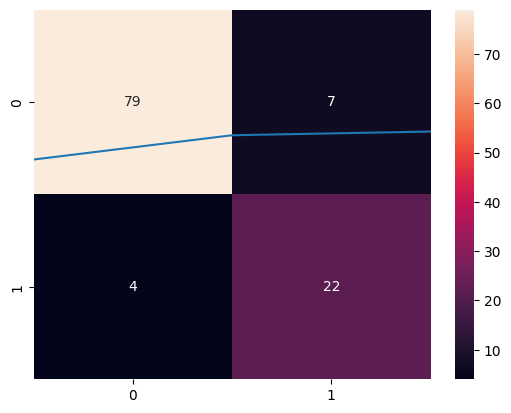

In [179]:
# sa malo neurona
learning_rate = 0.001
epochs = 30

model = Net(5)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses = []

for i in range(epochs):
    print(f'Epoch {i+1}\n-------------------------------')
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_acc = test_loop(test_dataloader, model, loss_fn)
    losses.append(np.mean(train_loss))

plt.figure()
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("train loss")

plot_confusion_matrix(model, test_dataloader)

Epoch 1
-------------------------------
loss: 1.188262  [    8/  455]
loss: 0.813262  [   48/  455]
loss: 0.802570  [   88/  455]
loss: 0.452521  [  128/  455]
loss: 0.402414  [  168/  455]
loss: 0.661199  [  208/  455]
loss: 0.560756  [  248/  455]
loss: 0.438276  [  288/  455]
loss: 0.476040  [  328/  455]
loss: 0.562625  [  368/  455]
loss: 0.433738  [  408/  455]
loss: 0.523478  [  448/  455]
Test Error: 
 Accuracy: 89.5%, Avg loss: 0.403465 

Epoch 2
-------------------------------
loss: 0.320702  [    8/  455]
loss: 0.435820  [   48/  455]
loss: 0.313838  [   88/  455]
loss: 0.563244  [  128/  455]
loss: 0.563273  [  168/  455]
loss: 0.412393  [  208/  455]
loss: 0.364990  [  248/  455]
loss: 0.313299  [  288/  455]
loss: 0.563262  [  328/  455]
loss: 0.809882  [  368/  455]
loss: 0.313263  [  408/  455]
loss: 0.318432  [  448/  455]
Test Error: 
 Accuracy: 54.4%, Avg loss: 0.731367 

Epoch 3
-------------------------------
loss: 0.656258  [    8/  455]
loss: 0.563266  [   48/  4

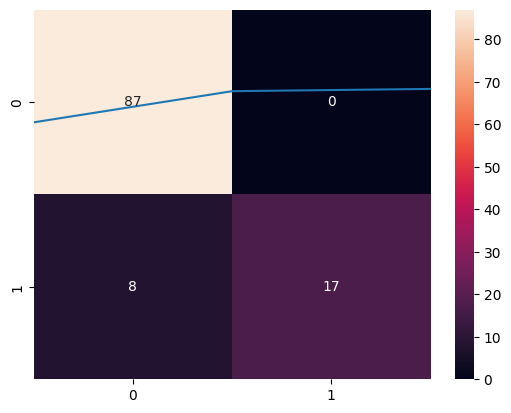

In [185]:
# sa previse neurona
learning_rate = 0.001
epochs = 30

model = Net(200)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses = []

for i in range(epochs):
    print(f'Epoch {i+1}\n-------------------------------')
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_acc = test_loop(test_dataloader, model, loss_fn)
    losses.append(np.mean(train_loss))

plt.figure()
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("train loss")
plot_confusion_matrix(model, test_dataloader)

## Vise skrivenih slojeva

In [186]:
# neural net with more then one hidden layer
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(30, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 10)
        self.fc4 = nn.Linear(10, 2)
        
    def forward(self, x):
        output = F.relu(self.fc1(x))
        output = F.relu(self.fc2(output))
        output = F.relu(self.fc3(output))
        logits = F.softmax(self.fc4(output), dim=1)
        return logits

Epoch 1
-------------------------------
loss: 1.188255  [    8/  455]
loss: 0.813235  [   48/  455]
loss: 0.938018  [   88/  455]
loss: 1.062773  [  128/  455]
loss: 0.561270  [  168/  455]
loss: 0.673938  [  208/  455]
loss: 0.759615  [  248/  455]
loss: 0.732456  [  288/  455]
loss: 0.625722  [  328/  455]
loss: 0.596119  [  368/  455]
loss: 0.646971  [  408/  455]
loss: 0.590879  [  448/  455]
Test Error: 
 Accuracy: 86.8%, Avg loss: 0.609950 

Epoch 2
-------------------------------
loss: 0.640910  [    8/  455]
loss: 0.521536  [   48/  455]
loss: 0.540506  [   88/  455]
loss: 0.501917  [  128/  455]
loss: 0.485725  [  168/  455]
loss: 0.438876  [  208/  455]
loss: 0.610068  [  248/  455]
loss: 0.379445  [  288/  455]
loss: 0.499326  [  328/  455]
loss: 0.449576  [  368/  455]
loss: 0.414614  [  408/  455]
loss: 0.624319  [  448/  455]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.422446 

Epoch 3
-------------------------------
loss: 0.502931  [    8/  455]
loss: 0.483748  [   48/  4

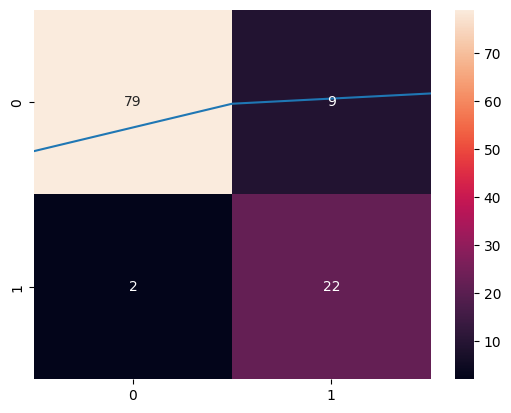

In [188]:
learning_rate = 0.001
epochs = 30

model = Net2()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losses = []
for i in range(epochs):
    print(f'Epoch {i+1}\n-------------------------------')
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_acc = test_loop(test_dataloader, model, loss_fn)
    losses.append(np.mean(train_loss))

plt.figure()
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("train loss")
plot_confusion_matrix(model, test_dataloader)


## Rano zaustavljanje

In [189]:
def early_stop(train_dataloader, test_dataloader, model, loss_fn, optimizer, stop_after):
    best_accuracy = 0
    for i in range(200):
        print(f'Epoch {i}') 
        train_loop(train_dataloader, model, loss_fn, optimizer)
        accuracy = test_loop(test_dataloader, model, loss_fn)
    
        if accuracy >= best_accuracy:
            best_accuracy = accuracy
        else:
            stop_after -= 1
        if stop_after == 0:
            break

Epoch 0
loss: 0.901764  [    8/  455]
loss: 0.660296  [   48/  455]
loss: 0.720448  [   88/  455]
loss: 0.759724  [  128/  455]
loss: 0.636320  [  168/  455]
loss: 0.573919  [  208/  455]
loss: 0.511773  [  248/  455]
loss: 0.650796  [  288/  455]
loss: 0.364189  [  328/  455]
loss: 0.335585  [  368/  455]
loss: 0.507439  [  408/  455]
loss: 0.436549  [  448/  455]
Test Error: 
 Accuracy: 90.4%, Avg loss: 0.391231 

Epoch 1
loss: 0.570783  [    8/  455]
loss: 0.434850  [   48/  455]
loss: 0.700631  [   88/  455]
loss: 0.330750  [  128/  455]
loss: 0.688326  [  168/  455]
loss: 0.330124  [  208/  455]
loss: 0.531453  [  248/  455]
loss: 0.352686  [  288/  455]
loss: 0.382680  [  328/  455]
loss: 0.327908  [  368/  455]
loss: 0.402740  [  408/  455]
loss: 0.341823  [  448/  455]
Test Error: 
 Accuracy: 86.0%, Avg loss: 0.438159 

Epoch 2
loss: 0.329891  [    8/  455]
loss: 0.319056  [   48/  455]
loss: 0.392827  [   88/  455]
loss: 0.558043  [  128/  455]
loss: 0.416485  [  168/  455]
lo

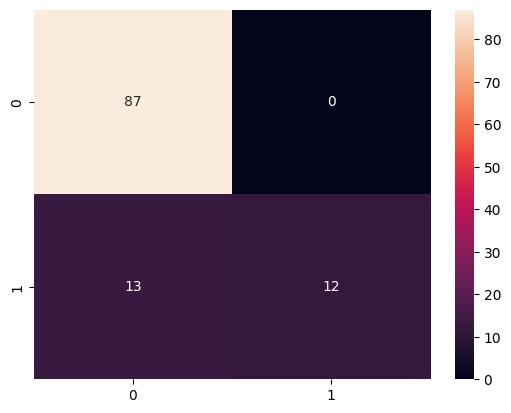

In [195]:
# Rano zaustavljanje
learning_rate = 0.01
epochs = 30

model = Net2()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# ako se preciznost ne povecava posle 5 epocha, treniranje se zaustavlja
early_stop(train_dataloader, test_dataloader, model, loss_fn, optimizer, 5)

plot_confusion_matrix(model, test_dataloader)

## Dropout regularizacija

In [196]:
# neural net with dropout regularization
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(30, 30)
        self.drop1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(30, 20)
        self.drop2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(20, 10)
        self.drop3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(10, 2)

    def forward(self, x):
        output = F.relu(self.fc1(x))
        output = self.drop1(output)
        output = F.relu(self.fc2(output))
        output = self.drop2(output)
        output = F.relu(self.fc3(output))
        output = self.drop3(output)
        logits = F.softmax(self.fc4(output))
        return logits 

Epoch 1
-------------------------------
loss: 0.871036  [    8/  455]
loss: 0.762440  [   48/  455]
loss: 0.468275  [   88/  455]
loss: 0.871990  [  128/  455]
loss: 0.610005  [  168/  455]
loss: 0.625814  [  208/  455]
loss: 0.829436  [  248/  455]
loss: 0.927167  [  288/  455]
loss: 0.733540  [  328/  455]
loss: 0.931254  [  368/  455]
loss: 0.761431  [  408/  455]
loss: 0.866335  [  448/  455]
Test Error: 
 Accuracy: 77.2%, Avg loss: 0.557136 

Epoch 2
-------------------------------
loss: 0.551850  [    8/  455]
loss: 0.447693  [   48/  455]
loss: 0.562433  [   88/  455]
loss: 0.428280  [  128/  455]
loss: 0.580499  [  168/  455]
loss: 0.470236  [  208/  455]
loss: 0.438523  [  248/  455]
loss: 0.456087  [  288/  455]
loss: 0.538944  [  328/  455]
loss: 0.678528  [  368/  455]
loss: 0.379541  [  408/  455]
loss: 0.473599  [  448/  455]
Test Error: 
 Accuracy: 87.7%, Avg loss: 0.460786 

Epoch 3
-------------------------------
loss: 0.583424  [    8/  455]
loss: 0.463663  [   48/  4

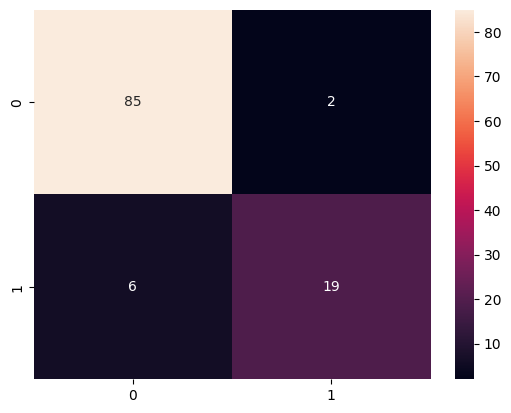

In [198]:
# Regularizacija
learning_rate = 0.001
epochs = 30

model = Net3()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for i in range(epochs):
    print(f'Epoch {i+1}\n-------------------------------')
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_acc = test_loop(test_dataloader, model, loss_fn)


plot_confusion_matrix(model, test_dataloader)
